In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
pip install catboost

In [143]:
 # Prepare & import all library
import numpy as np
import pandas as pd
import math
import random
import seaborn as sns

from scipy.stats import pearsonr, jarque_bera
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### Load data, split features to X and y, define standard scaler

In [75]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/telco_customer.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Customer_ID,Tenure_Months,Location,Device_Class,Games_Product,Music_Product,Education_Product,Call_Center,Video_Product,Use_MyApp,Payment_Method,Monthly_Purchase_Th_IDR,Churn_Label,Longitude,Latitude,CLTV_Th_IDR_Pred
0,0,0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


In [76]:
# Encode categorical data
def encode_data(dataframe):
    if dataframe.dtype == "object":
        dataframe = LabelEncoder().fit_transform(dataframe)
    return dataframe

df = df.apply(lambda x: encode_data(x))
df.head()

,Unnamed: 0.1,Unnamed: 0,Customer_ID,Tenure_Months,Location,Device_Class,Games_Product,Music_Product,Education_Product,Call_Center,Video_Product,Use_MyApp,Payment_Method,Monthly_Purchase_Th_IDR,Churn_Label,Longitude,Latitude,CLTV_Th_IDR_Pred
0,0,0,0,2,1,2,2,2,0,0,0,0,2,70.005,1,106.816666,-6.2,4210.7
1,1,1,1,2,1,0,0,0,0,0,0,0,3,91.910,1,106.816666,-6.2,3511.3
2,2,2,2,8,1,0,0,0,2,0,2,2,3,129.545,1,106.816666,-6.2,6983.6
3,3,3,3,28,1,0,0,0,2,1,2,2,3,136.240,1,106.816666,-6.2,6503.9
4,4,4,4,49,1,0,0,2,2,0,2,2,1,134.810,1,106.816666,-6.2,6942.0


In [77]:
# Define X and y
X = df.drop(columns = ["Churn_Label", 'Unnamed: 0', 'Unnamed: 0.1' , 'Customer_ID', 'Longitude', 'Latitude'])
y = df["Churn_Label"]

In [78]:
# Check X
X.head()

,Tenure_Months,Location,Device_Class,Games_Product,Music_Product,Education_Product,Call_Center,Video_Product,Use_MyApp,Payment_Method,Monthly_Purchase_Th_IDR,CLTV_Th_IDR_Pred
0,2,1,2,2,2,0,0,0,0,2,70.005,4210.7
1,2,1,0,0,0,0,0,0,0,3,91.910,3511.3
2,8,1,0,0,0,2,0,2,2,3,129.545,6983.6
3,28,1,0,0,0,2,1,2,2,3,136.240,6503.9
4,49,1,0,0,2,2,0,2,2,1,134.810,6942.0


In [79]:
# Check y
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn_Label, dtype: int64

In [80]:
# Define standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Split the data (80:20), random state 42

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4930, 12)
(2113, 12)
(4930,)
(2113,)


### Machine Learning Modelling & Selection
Logistic Regression, Random Forest Classifier, Decision Tree Claasifier, Gaussian NB, KNeighbors Classifier, SCV, AdaBoost Classifier, GradientBoosting Classifier, XGBoost Classifier, CatBoost Classifier, Neural Network


#Logistic Regression (LR)

In [82]:
# Logistic Regression
LM = LogisticRegression()
LM.fit(X_train, y_train)
y_pred = LM.predict(X_test)

print("Accuracy Score for Logistic Regression is ", accuracy_score(y_test, y_pred))

Accuracy Score for Logistic Regression is  0.7931850449597728


In [83]:
# Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1525
           1       0.67      0.52      0.58       588

    accuracy                           0.79      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.78      0.79      0.78      2113



# Random Forest Classifier

In [84]:
# Random Forest Classifier
LM = RandomForestClassifier()
LM.fit(X_train, y_train)
y_pred = LM.predict(X_test)

print("Accuracy Score for Random Forest Classifier is ", accuracy_score(y_test, y_pred))

Accuracy Score for Random Forest Classifier is  0.7775674396592522


In [85]:
# Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1525
           1       0.63      0.49      0.55       588

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113



#Decision Tree Claasifier


In [86]:
# Decision Tree Classifier
LM = DecisionTreeClassifier()
LM.fit(X_train, y_train)
y_pred = LM.predict(X_test)

print("Accuracy Score for Decision Tree Classifier is ", accuracy_score(y_test, y_pred))

Accuracy Score for Decision Tree Classifier is  0.706578324656886


In [87]:
# Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1525
           1       0.47      0.48      0.48       588

    accuracy                           0.71      2113
   macro avg       0.64      0.64      0.64      2113
weighted avg       0.71      0.71      0.71      2113



#Gaussian NB

In [88]:
# Gaussian NB
LM = GaussianNB()
LM.fit(X_train, y_train)
y_pred = LM.predict(X_test)

print("Accuracy Score for Gaussian-NB is ", accuracy_score(y_test, y_pred))

Accuracy Score for Gaussian-NB is  0.7714150496923805


In [89]:
# Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1525
           1       0.58      0.64      0.61       588

    accuracy                           0.77      2113
   macro avg       0.72      0.73      0.72      2113
weighted avg       0.78      0.77      0.77      2113



# KNeighbors Classifier

In [90]:
# KNeighbors Classifier
LM = KNeighborsClassifier()
LM.fit(X_train, y_train)
y_pred = LM.predict(X_test)

print("Accuracy Score for KN Classifier is ", accuracy_score(y_test, y_pred))

Accuracy Score for KN Classifier is  0.7553241836251775


In [91]:
# Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1525
           1       0.57      0.47      0.52       588

    accuracy                           0.76      2113
   macro avg       0.69      0.67      0.68      2113
weighted avg       0.74      0.76      0.75      2113



#AdaBoost Classifier

In [94]:
# AdaBoost Classifier
LM = AdaBoostClassifier()
LM.fit(X_train, y_train)
y_pred = LM.predict(X_test)

print("Accuracy Score for AdaBoost Classifier is ", accuracy_score(y_test, y_pred))

Accuracy Score for AdaBoost Classifier is  0.79649787032655


In [95]:
# Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1525
           1       0.68      0.52      0.59       588

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



# GradientBoosting Classifier

In [96]:
# GradientBoost Classifier
LM = GradientBoostingClassifier()
LM.fit(X_train, y_train)
y_pred = LM.predict(X_test)

print("Accuracy Score for GradientBoost Classifier is ", accuracy_score(y_test, y_pred))

Accuracy Score for GradientBoost Classifier is  0.7917652626597255


In [97]:
# Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1525
           1       0.66      0.53      0.59       588

    accuracy                           0.79      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.78      0.79      0.78      2113



# Voting Classifier

In [98]:
# Voting Classifier
LM = VotingClassifier(estimators=[('gbc', GradientBoostingClassifier()), ('lr', LogisticRegression()), ('abc',  AdaBoostClassifier())], voting='soft')
LM.fit(X_train, y_train)
y_pred = LM.predict(X_test)

print("Accuracy Score for Voting Classifier is ", accuracy_score(y_test, y_pred))

Accuracy Score for Voting Classifier is  0.79649787032655


In [99]:
# Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1525
           1       0.68      0.52      0.59       588

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



# XGBoost Classifier

In [100]:
# XGBoost Classifier
LM = XGBClassifier()
LM.fit(X_train, y_train)
y_pred = LM.predict(X_test)

print("Accuracy Score for XGB CLassifier is ", accuracy_score(y_test, y_pred))

Accuracy Score for XGB CLassifier is  0.77520113582584


In [101]:
# Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1525
           1       0.61      0.52      0.56       588

    accuracy                           0.78      2113
   macro avg       0.72      0.70      0.71      2113
weighted avg       0.77      0.78      0.77      2113



### Hyperparameter Tuning and then compare with those models

# Logistic Regression

In [107]:
LM = LogisticRegression()

param_grid = {
    'max_iter': [100, 200, 300],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

gs1 = GridSearchCV(
        estimator= LM,
        param_grid = param_grid,
        cv=5,
        n_jobs=-1,
        scoring='roc_auc'
    )

fit_LM_LR = gs1.fit(X_train, y_train)

print(fit_LM_LR.best_params_)
print(fit_LM_LR.best_score_)

{'max_iter': 100, 'multi_class': 'auto', 'solver': 'liblinear'}
0.8289817173913206


In [108]:
y_pred = fit_LM_LR.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1525
           1       0.67      0.52      0.58       588

    accuracy                           0.79      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.78      0.79      0.78      2113



# Random Forest Classifier

In [112]:
LM = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'criterion' : ['gini', 'entropy']
}

gs1 = GridSearchCV(
        estimator= LM,
        param_grid = param_grid,
        cv=5,
        n_jobs=-1,
        scoring='roc_auc'
    )

fit_LM_RF = gs1.fit(X_train, y_train)

print(fit_LM_RF.best_params_)
print(fit_LM_RF.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}
0.8236579660817094


In [113]:
y_pred = fit_LM_RF.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1525
           1       0.66      0.53      0.59       588

    accuracy                           0.79      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.78      0.79      0.79      2113



# Decision Tree Classifier

In [117]:
LM = DecisionTreeClassifier()

param_grid = {
    'min_samples_leaf': [1,2,4],
    'max_depth': [None, 10, 20, 30, 40],
    'criterion' : ['gini', 'entropy']
}

gs1 = GridSearchCV(
        estimator= LM,
        param_grid = param_grid,
        cv=5,
        n_jobs=-1,
        scoring='roc_auc'
    )

fit_LM_DT = gs1.fit(X_train, y_train)

print(fit_LM_DT.best_params_)
print(fit_LM_DT.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4}
0.7382174669175793


In [118]:
y_pred = fit_LM_RF.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1525
           1       0.65      0.52      0.58       588

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.78      0.79      0.78      2113



#Gaussian NB

In [121]:
LM = GaussianNB()

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7],
}

gs1 = GridSearchCV(
        estimator= LM,
        param_grid = param_grid,
        cv=5,
        n_jobs=-1,
        scoring='roc_auc'
    )

fit_LM_GNB = gs1.fit(X_train, y_train)

print(fit_LM_GNB.best_params_)
print(fit_LM_GNB.best_score_)

{'var_smoothing': 1e-09}
0.8106534465429572


In [122]:
y_pred = fit_LM_GNB.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1525
           1       0.58      0.64      0.61       588

    accuracy                           0.77      2113
   macro avg       0.72      0.73      0.72      2113
weighted avg       0.78      0.77      0.77      2113



#KNeighbors Classifier

In [124]:
LM = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

gs1 = GridSearchCV(
        estimator= LM,
        param_grid = param_grid,
        cv=5,
        n_jobs=-1,
        scoring='roc_auc'
    )

fit_LM_KN = gs1.fit(X_train, y_train)

print(fit_LM_KN.best_params_)
print(fit_LM_KN.best_score_)

{'n_neighbors': 7, 'weights': 'uniform'}
0.7745186118125513


In [125]:
y_pred = fit_LM_KN.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1525
           1       0.59      0.48      0.53       588

    accuracy                           0.76      2113
   macro avg       0.70      0.67      0.68      2113
weighted avg       0.75      0.76      0.75      2113



# AdaBoost Classifier

In [128]:
LM = AdaBoostClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],  # Jumlah estimator (pohon kecil) dalam ensemble.
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  # Tingkat pembelajaran.
    'algorithm': ['SAMME', 'SAMME.R']  # Algoritma yang digunakan.
}

gs1 = GridSearchCV(
        estimator= LM,
        param_grid = param_grid,
        cv=5,
        n_jobs=-1,
        scoring='roc_auc'
    )

fit_LM_ABC = gs1.fit(X_train, y_train)

print(fit_LM_ABC.best_params_)
print(fit_LM_ABC.best_score_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 200}
0.8343161037882695


In [129]:
y_pred = fit_LM_ABC.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1525
           1       0.67      0.49      0.57       588

    accuracy                           0.79      2113
   macro avg       0.75      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



#Voting Classifier


In [132]:
gbc = GradientBoostingClassifier()
lr = LogisticRegression()
abc = AdaBoostClassifier()


LM = VotingClassifier(estimators=[('gbc', GradientBoostingClassifier()), ('lr', LogisticRegression()), ('abc',  AdaBoostClassifier())], voting='soft')

param_grid = {
    'gbc__n_estimators': [50, 100, 200],  # Parameter untuk GradientBoostingClassifier
    'lr__C': [0.1, 1, 10],  # Parameter untuk LogisticRegression
    'abc__n_estimators': [50, 100, 200],  # Parameter untuk AdaBoostClassifier
}
gs1 = GridSearchCV(
        estimator= LM,
        param_grid = param_grid,
        cv=5,
        n_jobs=-1,
        scoring='roc_auc'
    )

fit_LM_VC = gs1.fit(X_train, y_train)

print(fit_LM_VC.best_params_)
print(fit_LM_VC.best_score_)

{'abc__n_estimators': 50, 'gbc__n_estimators': 50, 'lr__C': 1}
0.8346534313838122


In [133]:
y_pred = fit_LM_VC.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1525
           1       0.68      0.51      0.59       588

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



# XGBoost Classifier

In [134]:
LM = XGBClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],  # Jumlah estimator (pohon) dalam ensemble.
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  # Tingkat pembelajaran.
    'max_depth': [3, 4, 5],  # Kedalaman maksimum pohon.
    'subsample': [0.8, 1.0],  # Proporsi sampel yang digunakan dalam setiap estimator.
}

gs1 = GridSearchCV(
        estimator= LM,
        param_grid = param_grid,
        cv=5,
        n_jobs=-1,
        scoring='roc_auc'
    )

fit_LM_XGB = gs1.fit(X_train, y_train)

print(fit_LM_XGB.best_params_)
print(fit_LM_XGB.best_score_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
0.8341864878543088


In [135]:
y_pred = fit_LM_XGB.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1525
           1       0.67      0.52      0.58       588

    accuracy                           0.79      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.78      0.79      0.79      2113



# ROC Analysis

In [144]:
# Predict the probabilities for the churn: Yes, class
y_pred_LOGREG = fit_LM_LR.predict_proba(X_test)[:,1]
y_pred_ranfor = fit_LM_RF.predict_proba(X_test)[:,1]
y_pred_dectree= fit_LM_DT.predict_proba(X_test)[:,1]
y_pred_gauss= fit_LM_GNB.predict_proba(X_test)[:,1]
y_pred_kneigh = fit_LM_KN.predict_proba(X_test)[:,1]
y_pred_adaboost = fit_LM_ABC.predict_proba(X_test)[:,1]
y_pred_voting = fit_LM_VC.predict_proba(X_test)[:,1]
y_pred_xgboost= fit_LM_XGB.predict_proba(X_test)[:,1]

# Calculate the AUC-ROC scores
auc_LOGREG = roc_auc_score(y_test, y_pred_LOGREG)
auc_ranfor = roc_auc_score(y_test, y_pred_ranfor)
auc_dt = roc_auc_score(y_test, y_pred_dectree)
auc_gauss = roc_auc_score(y_test, y_pred_gauss)
auc_kn = roc_auc_score(y_test, y_pred_kneigh)
auc_aboost = roc_auc_score(y_test, y_pred_adaboost)
auc_voting = roc_auc_score(y_test, y_pred_voting)
auc_xgbos = roc_auc_score(y_test, y_pred_xgboost)

print(f"AUC-ROC for Logistic Regression: {auc_LOGREG}")
print(f"AUC-ROC for Random Forest: {auc_ranfor}")
print(f"AUC-ROC for Decision Tree: {auc_dt}")
print(f"AUC-ROC for Gaussian-NB: {auc_gauss}")
print(f"AUC-ROC for K-Nearest Neighbors Classifier: {auc_kn}")
print(f"AUC-ROC for AdaBoost Classifier: {auc_aboost}")
print(f"AUC-ROC for Voting Classifier: {auc_voting}")
print(f"AUC-ROC for XGBoost Classifier: {auc_xgbos}")

AUC-ROC for Logistic Regression: 0.8258536857365897
AUC-ROC for Random Forest: 0.8341451990632319
AUC-ROC for Decision Tree: 0.7587849894055984
AUC-ROC for Gaussian-NB: 0.8109847217575555
AUC-ROC for K-Nearest Neighbors Classifier: 0.7834359317497491
AUC-ROC for AdaBoost Classifier: 0.8403958960633434
AUC-ROC for Voting Classifier: 0.838368462138954
AUC-ROC for XGBoost Classifier: 0.8426519460243114


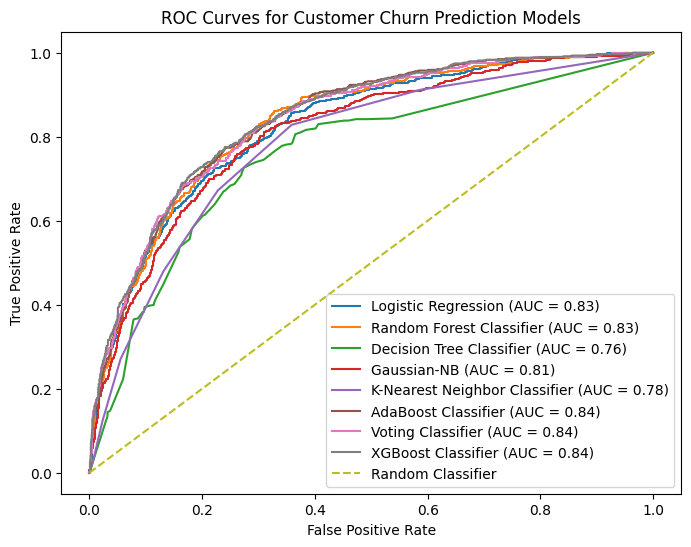

In [146]:
# Visualizing ROC
def plot_roc_curves(y_test,
                    y_pred_LOGREG,
                    y_pred_ranfor,
                    y_pred_dectree,
                    y_pred_gauss,
                    y_pred_kneigh,
                    y_pred_adaboost,
                    y_pred_voting,
                    y_pred_xgboost):
    plt.figure(figsize=(8, 6))

    # Calculate ROC curves for each model
    fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_LOGREG)
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_ranfor)
    fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dectree)
    fpr_gauss, tpr_gauss, _ = roc_curve(y_test, y_pred_gauss)
    fpr_kn, tpr_kn, _ = roc_curve(y_test, y_pred_kneigh)
    fpr_abc, tpr_abc, _ = roc_curve(y_test, y_pred_adaboost)
    fpr_vc, tpr_vc, _ = roc_curve(y_test, y_pred_voting)
    fpr_xgbc, tpr_xgbc, _ = roc_curve(y_test, y_pred_xgboost)

    # Plot ROC curves
    plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_LOGREG:.2f})')
    plt.plot(fpr_rf, tpr_rf, label=f'Random Forest Classifier (AUC = {auc_ranfor:.2f})')
    plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree Classifier (AUC = {auc_dt:.2f})')
    plt.plot(fpr_gauss, tpr_gauss, label=f'Gaussian-NB (AUC = {auc_gauss:.2f})')
    plt.plot(fpr_kn, tpr_kn, label=f'K-Nearest Neighbor Classifier (AUC = {auc_kn:.2f})')
    plt.plot(fpr_abc, tpr_abc, label=f'AdaBoost Classifier (AUC = {auc_aboost:.2f})')
    plt.plot(fpr_vc, tpr_vc, label=f'Voting Classifier (AUC = {auc_voting:.2f})')
    plt.plot(fpr_xgbc, tpr_xgbc, label=f'XGBoost Classifier (AUC = {auc_xgbos:.2f})')

    # Plot random classifier
    plt.plot([0,1],[0,1], linestyle='--', label='Random Classifier')

    # Format the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Customer Churn Prediction Models')
    plt.legend()
    plt.show()

plot_roc_curves(y_test,
                y_pred_LOGREG,
                y_pred_ranfor,
                y_pred_dectree,
                y_pred_gauss,
                y_pred_kneigh,
                y_pred_adaboost,
                y_pred_voting,
                y_pred_xgboost
                )

In [149]:
# Define Threshold
def find_thresholds(y_pred, y_test, thresholds):
    fpr_list = []
    tpr_list = []
    for threshold in thresholds:
        y_pred_binary = (y_pred > threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
        fpr = fp / (fp + tn)
        tpr = tp / (tp + fn)
        fpr_list.append(fpr)
        tpr_list.append(tpr)
    return fpr_list, tpr_list

thresholds = np.arange(0, 1.1, 0.1)

fpr_logreg, tpr_logreg = find_thresholds(y_pred_LOGREG, y_test, thresholds)
fpr_rf, tpr_rf = find_thresholds(y_pred_ranfor, y_test, thresholds)
fpr_dt, tpr_dt = find_thresholds(y_pred_dectree, y_test, thresholds)
fpr_gauss, tpr_gauss = find_thresholds(y_pred_gauss,y_test, thresholds)
fpr_kn, tpr_kn = find_thresholds(y_pred_kneigh, y_test, thresholds)
fpr_abc, tpr_abc = find_thresholds(y_pred_adaboost, y_test, thresholds)
fpr_vc, tpr_vc = find_thresholds(y_pred_voting, y_test, thresholds)
fpr_xgbc, tpr_xgbc = find_thresholds(y_pred_xgboost,y_test, thresholds)

summary_df = pd.DataFrame({
    'Threshold' : thresholds,
    'Logistic Regression FPR' : fpr_logreg,
    'Logistic Regression TPR' : tpr_logreg,
    'Random Forest FPR' : fpr_rf,
    'Random Forest TPR' : tpr_rf,
    'Decision Tree FPR' : fpr_dt,
    'Decision Tree TPR' : tpr_dt,
    'Gaussian-NB FPR' : fpr_gauss,
    'Gaussian-NB TPR' : tpr_gauss,
    'KNN Classifier FPR' : fpr_kn,
    'KNN Classifier TPR' : tpr_kn,
    'AdaBoost Classifier FPR' : fpr_abc,
    'AdaBoost Classifier TPR' : tpr_abc,
    'Voting Classifier FPR' : fpr_vc,
    'Voting Classifier TPR' : tpr_vc,
    'XGBoost Classifier' : fpr_xgbc,
    'XGBoost Classifier' : tpr_xgbc,


})

print(summary_df)

    Threshold  Logistic Regression FPR  Logistic Regression TPR  \
0         0.0                 1.000000                 1.000000   
1         0.1                 0.569180                 0.931973   
2         0.2                 0.339672                 0.829932   
3         0.3                 0.242623                 0.732993   
4         0.4                 0.163279                 0.639456   
5         0.5                 0.099672                 0.517007   
6         0.6                 0.055738                 0.367347   
7         0.7                 0.027541                 0.256803   
8         0.8                 0.003279                 0.017007   
9         0.9                 0.000000                 0.000000   
10        1.0                 0.000000                 0.000000   

    Random Forest FPR  Random Forest TPR  Decision Tree FPR  \
0            1.000000           1.000000           0.537049   
1            0.550820           0.933673           0.401311   
2     

In [150]:
summary_df

,Threshold,Logistic Regression FPR,Logistic Regression TPR,Random Forest FPR,Random Forest TPR,Decision Tree FPR,Decision Tree TPR,Gaussian-NB FPR,Gaussian-NB TPR,KNN Classifier FPR,KNN Classifier TPR,AdaBoost Classifier FPR,AdaBoost Classifier TPR,Voting Classifier FPR,Voting Classifier TPR,XGBoost Classifier
0,0.0,1.000000,1.000000,1.000000,1.000000,0.537049,0.843537,1.000000,1.000000,0.586230,0.911565,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.1,0.569180,0.931973,0.550820,0.933673,0.401311,0.819728,0.430820,0.862245,0.586230,0.911565,1.000000,1.000000,1.000000,1.000000,0.940476
2,0.2,0.339672,0.829932,0.366557,0.875850,0.354098,0.782313,0.300328,0.787415,0.358689,0.828231,1.000000,1.000000,0.723279,0.977891,0.874150
3,0.3,0.242623,0.732993,0.245902,0.761905,0.270164,0.714286,0.249180,0.732993,0.227541,0.671769,1.000000,1.000000,0.340984,0.853741,0.761905
4,0.4,0.163279,0.639456,0.160656,0.647959,0.210492,0.622449,0.208525,0.690476,0.227541,0.671769,0.998689,0.998299,0.186230,0.693878,0.649660
5,0.5,0.099672,0.517007,0.108197,0.517007,0.160000,0.537415,0.179672,0.644558,0.131148,0.479592,0.090492,0.486395,0.093115,0.513605,0.517007
6,0.6,0.055738,0.367347,0.049180,0.340136,0.097705,0.394558,0.155410,0.603741,0.055082,0.270408,0.000000,0.000000,0.039344,0.299320,0.374150
7,0.7,0.027541,0.256803,0.013115,0.170068,0.079344,0.365646,0.116721,0.523810,0.055082,0.270408,0.000000,0.000000,0.001967,0.028912,0.195578
8,0.8,0.003279,0.017007,0.002623,0.057823,0.035410,0.146259,0.080656,0.421769,0.022951,0.122449,0.000000,0.000000,0.000000,0.000000,0.056122
9,0.9,0.000000,0.000000,0.000000,0.000000,0.030820,0.129252,0.047213,0.297619,0.006557,0.028912,0.000000,0.000000,0.000000,0.000000,0.000000


### Find out best threshold

In [151]:
#Find out best threshold
def find_best_threshold(y_test, y_pred):
    # based on Youden's Index
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    #calculate Youden's Index
    youden_index = tpr - fpr

    #pick best threshold
    optimal_idx = np.argmax(youden_index)
    return thresholds[optimal_idx]

best_threshold_logreg = find_best_threshold(y_test, y_pred_LOGREG)
best_threshold_rf = find_best_threshold(y_test, y_pred_ranfor)
best_threshold_dt = find_best_threshold(y_test, y_pred_dectree)
best_threshold_gnb = find_best_threshold(y_test, y_pred_gauss)
best_threshold_knn = find_best_threshold(y_test, y_pred_kneigh)
best_threshold_abc = find_best_threshold(y_test, y_pred_adaboost)
best_threshold_vt = find_best_threshold(y_test, y_pred_voting)
best_threshold_xgb = find_best_threshold(y_test, y_pred_xgboost)

print(f"Best threshold for Logistic Regression: {best_threshold_logreg}")
print(f"Best threshold for Random Forest: {best_threshold_rf}")
print(f"Best threshold for Decision Tree: {best_threshold_dt}")
print(f"Best threshold for Gaussian-NB: {best_threshold_gnb}")
print(f"Best threshold for KNN Classifier: {best_threshold_knn}")
print(f"Best threshold for AdaBoost Classifier: {best_threshold_abc}")
print(f"Best threshold for Voting Classifier: {best_threshold_vt}")
print(f"Best threshold for XGBoost Classifier: {best_threshold_xgb}")

Best threshold for Logistic Regression: 0.3286749873127836
Best threshold for Random Forest: 0.22868532053262192
Best threshold for Decision Tree: 0.2857142857142857
Best threshold for Gaussian-NB: 0.1849317203960866
Best threshold for KNN Classifier: 0.2857142857142857
Best threshold for AdaBoost Classifier: 0.48840915958985315
Best threshold for Voting Classifier: 0.3340384515083481
Best threshold for XGBoost Classifier: 0.29092031717300415


In [152]:
#Save Model
import pickle
pklname = 'customer_churn.pkl'

with open(pklname, 'wb') as file:
  pickle.dump(fit_LM_XGB, file)